In [4]:
import sys
sys.path.append('..')
from utilities.get_data import get_historical_from_db
import pandas as pd 
import ccxt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import math

In [37]:
df = get_historical_from_db(ccxt.binance(),"ALGO/USDT","1h",path="../database/").loc[:]

In [38]:
df["return_pct"] = df["close"].pct_change() * 100
df["abs_return"] = abs(df["return_pct"])
df["abs_return_round"] = df["abs_return"].round(1)
df["evol_1"] = ((df["close"].rolling(1).mean().shift(-1) - df["close"]) / df["close"] * 100)
df["evol_3"] = ((df["close"].rolling(3).mean().shift(-3) - df["close"]) / df["close"] * 100)
df["evol_5"] = (df["close"].rolling(5).mean().shift(-5) - df["close"]) / df["close"] * 100
df["evol_10"] = (df["close"].rolling(10).mean().shift(-10) - df["close"]) / df["close"] * 100
df["evol_20"] = (df["close"].rolling(20).mean().shift(-20) - df["close"]) / df["close"] * 100
df["evol_50"] = (df["close"].rolling(50).mean().shift(-50) - df["close"]) / df["close"] * 100

evol_top10 = df["abs_return"].fillna(0).sort_values().iloc[int(-0.1*len(df)):].iloc[0]
evol_top5 = df["abs_return"].fillna(0).sort_values().iloc[int(-0.05*len(df)):].iloc[0]
evol_top1 = df["abs_return"].fillna(0).sort_values().iloc[int(-0.01*len(df)):].iloc[0]
df

,open,high,low,close,volume,return_pct,abs_return,abs_return_round,evol_1,evol_3,evol_5,evol_10,evol_20,evol_50
date,,,,,,,,,,,,,,
2019-06-22 00:00:00,3.4000,3.4400,2.6210,2.7090,2138741.658,NaN,NaN,NaN,0.221484,-2.288667,-4.252492,-6.009598,-12.541528,-20.925803
2019-06-22 01:00:00,2.7010,2.7960,2.5300,2.7150,902015.539,0.221484,0.221484,0.2,-1.583794,-5.107428,-5.569061,-6.850829,-13.777164,-21.815838
2019-06-22 02:00:00,2.7150,2.7490,2.6010,2.6720,512599.433,-1.583794,1.583794,1.6,-4.416168,-5.414172,-5.261976,-6.133982,-13.250374,-21.258234
2019-06-22 03:00:00,2.6750,2.7140,2.5400,2.5540,994259.176,-4.416168,4.416168,4.4,-1.996868,-0.900548,-1.386061,-3.104933,-9.951057,-18.243540
2019-06-22 04:00:00,2.5430,2.5620,2.4760,2.5030,969104.836,-1.996868,1.996868,2.0,0.878945,1.211879,0.159808,-2.616860,-8.957251,-17.242509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31 12:00:00,0.4156,0.4176,0.4087,0.4103,2186280.000,-1.251504,1.251504,1.3,-1.974165,-0.666179,NaN,NaN,NaN,NaN
2022-05-31 13:00:00,0.4103,0.4198,0.3969,0.4022,6809098.000,-1.974165,1.974165,2.0,1.491795,2.171391,NaN,NaN,NaN,NaN
2022-05-31 14:00:00,0.4020,0.4087,0.3954,0.4082,3022118.000,1.491795,1.491795,1.5,1.004410,NaN,NaN,NaN,NaN,NaN


In [39]:
print(round(df["evol_1"].mean(), 2), "%")
print(round(df["evol_3"].mean(), 2), "%")
print(round(df["evol_5"].mean(), 2), "%")
print(round(df["evol_10"].mean(), 2), "%")
print(round(df["evol_20"].mean(), 2), "%")
print(round(df["evol_50"].mean(), 2), "%")

0.01 %
0.01 %
0.01 %
0.02 %
0.04 %
0.08 %


In [40]:
print("--- Evolution after a top 10% return candle (+/-"+str(round(evol_top10,2))+"%) ("+ str(len(df[df["return_pct"] > evol_top10])) +" candles) ---\n")
print("Mean evolution (+) after 1 period:", round(df[df["return_pct"] > evol_top10]["evol_1"].mean(),2), "%")
print("Mean evolution (+) after 3 period:", round(df[df["return_pct"] > evol_top10]["evol_3"].mean(),2), "%")
print("Mean evolution (+) after 5 period:", round(df[df["return_pct"] > evol_top10]["evol_5"].mean(),2), "%")
print("Mean evolution (+) after 10 period:", round(df[df["return_pct"] > evol_top10]["evol_10"].mean(),2), "%")
print("Mean evolution (+) after 20 period:", round(df[df["return_pct"] > evol_top10]["evol_20"].mean(),2), "%")
print("Mean evolution (+) after 50 period:", round(df[df["return_pct"] > evol_top10]["evol_50"].mean(),2), "%")
print("-"*30)
print("Mean evolution (-) after 1 period:", round(df[df["return_pct"] < -evol_top10]["evol_1"].mean(),2), "%")
print("Mean evolution (-) after 3 period:", round(df[df["return_pct"] < -evol_top10]["evol_3"].mean(),2), "%")
print("Mean evolution (-) after 5 period:", round(df[df["return_pct"] < -evol_top10]["evol_5"].mean(),2), "%")
print("Mean evolution (-) after 10 period:", round(df[df["return_pct"] < -evol_top10]["evol_10"].mean(),2), "%")
print("Mean evolution (-) after 20 period:", round(df[df["return_pct"] < -evol_top10]["evol_20"].mean(),2), "%")
print("Mean evolution (-) after 50 period:", round(df[df["return_pct"] < -evol_top10]["evol_50"].mean(),2), "%")

--- Evolution after a top 10% return candle (+/-2.39%) (1281 candles) ---

Mean evolution (+) after 1 period: -0.17 %
Mean evolution (+) after 3 period: -0.27 %
Mean evolution (+) after 5 period: -0.27 %
Mean evolution (+) after 10 period: -0.24 %
Mean evolution (+) after 20 period: -0.18 %
Mean evolution (+) after 50 period: -0.05 %
------------------------------
Mean evolution (-) after 1 period: 0.24 %
Mean evolution (-) after 3 period: 0.33 %
Mean evolution (-) after 5 period: 0.39 %
Mean evolution (-) after 10 period: 0.51 %
Mean evolution (-) after 20 period: 0.69 %
Mean evolution (-) after 50 period: 1.07 %


In [41]:
print("--- Evolution after a top 5% return candle (+/-"+str(round(evol_top5,2))+"%) ("+ str(len(df[df["return_pct"] > evol_top5])) +" candles) ---\n")
print("Mean evolution (+) after 1 period:", round(df[df["return_pct"] > evol_top5]["evol_1"].mean(),2), "%")
print("Mean evolution (+) after 3 period:", round(df[df["return_pct"] > evol_top5]["evol_3"].mean(),2), "%")
print("Mean evolution (+) after 5 period:", round(df[df["return_pct"] > evol_top5]["evol_5"].mean(),2), "%")
print("Mean evolution (+) after 10 period:", round(df[df["return_pct"] > evol_top5]["evol_10"].mean(),2), "%")
print("Mean evolution (+) after 20 period:", round(df[df["return_pct"] > evol_top5]["evol_20"].mean(),2), "%")
print("Mean evolution (+) after 50 period:", round(df[df["return_pct"] > evol_top5]["evol_50"].mean(),2), "%")
print("-"*30)
print("Mean evolution (-) after 1 period:", round(df[df["return_pct"] < -evol_top5]["evol_1"].mean(),2), "%")
print("Mean evolution (-) after 3 period:", round(df[df["return_pct"] < -evol_top5]["evol_3"].mean(),2), "%")
print("Mean evolution (-) after 5 period:", round(df[df["return_pct"] < -evol_top5]["evol_5"].mean(),2), "%")
print("Mean evolution (-) after 10 period:", round(df[df["return_pct"] < -evol_top5]["evol_10"].mean(),2), "%")
print("Mean evolution (-) after 20 period:", round(df[df["return_pct"] < -evol_top5]["evol_20"].mean(),2), "%")
print("Mean evolution (-) after 50 period:", round(df[df["return_pct"] < -evol_top5]["evol_50"].mean(),2), "%")

--- Evolution after a top 5% return candle (+/-3.15%) (648 candles) ---

Mean evolution (+) after 1 period: -0.2 %
Mean evolution (+) after 3 period: -0.32 %
Mean evolution (+) after 5 period: -0.33 %
Mean evolution (+) after 10 period: -0.32 %
Mean evolution (+) after 20 period: -0.22 %
Mean evolution (+) after 50 period: -0.14 %
------------------------------
Mean evolution (-) after 1 period: 0.33 %
Mean evolution (-) after 3 period: 0.43 %
Mean evolution (-) after 5 period: 0.47 %
Mean evolution (-) after 10 period: 0.58 %
Mean evolution (-) after 20 period: 0.77 %
Mean evolution (-) after 50 period: 1.39 %


In [42]:
print("--- Evolution after a top 1% return candle (+/-"+str(round(evol_top1,2))+"%) ("+ str(len(df[df["return_pct"] > evol_top1])) +" candles) ---\n")
print("Mean evolution (+) after 1 period:", round(df[df["return_pct"] > evol_top1]["evol_1"].mean(),2), "%")
print("Mean evolution (+) after 3 period:", round(df[df["return_pct"] > evol_top1]["evol_3"].mean(),2), "%")
print("Mean evolution (+) after 5 period:", round(df[df["return_pct"] > evol_top1]["evol_5"].mean(),2), "%")
print("Mean evolution (+) after 10 period:", round(df[df["return_pct"] > evol_top1]["evol_10"].mean(),2), "%")
print("Mean evolution (+) after 20 period:", round(df[df["return_pct"] > evol_top1]["evol_20"].mean(),2), "%")
print("Mean evolution (+) after 50 period:", round(df[df["return_pct"] > evol_top1]["evol_50"].mean(),2), "%")
print("-"*30)
print("Mean evolution (-) after 1 period:", round(df[df["return_pct"] < -evol_top1]["evol_1"].mean(),2), "%")
print("Mean evolution (-) after 3 period:", round(df[df["return_pct"] < -evol_top1]["evol_3"].mean(),2), "%")
print("Mean evolution (-) after 5 period:", round(df[df["return_pct"] < -evol_top1]["evol_5"].mean(),2), "%")
print("Mean evolution (-) after 10 period:", round(df[df["return_pct"] < -evol_top1]["evol_10"].mean(),2), "%")
print("Mean evolution (-) after 20 period:", round(df[df["return_pct"] < -evol_top1]["evol_20"].mean(),2), "%")
print("Mean evolution (-) after 50 period:", round(df[df["return_pct"] < -evol_top1]["evol_50"].mean(),2), "%")

--- Evolution after a top 1% return candle (+/-5.45%) (142 candles) ---

Mean evolution (+) after 1 period: 0.0 %
Mean evolution (+) after 3 period: -0.25 %
Mean evolution (+) after 5 period: -0.1 %
Mean evolution (+) after 10 period: 0.16 %
Mean evolution (+) after 20 period: 0.47 %
Mean evolution (+) after 50 period: 0.74 %
------------------------------
Mean evolution (-) after 1 period: 1.26 %
Mean evolution (-) after 3 period: 1.55 %
Mean evolution (-) after 5 period: 1.71 %
Mean evolution (-) after 10 period: 1.96 %
Mean evolution (-) after 20 period: 2.41 %
Mean evolution (-) after 50 period: 3.52 %


In [24]:
wallet = 1000
for i in range(int(365*24/100)):
    wallet += 0.0057 * wallet 
    
wallet

1639.66513127828

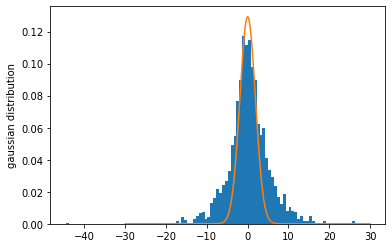

In [184]:
ax, ay, _ = plt.hist(df["return_pct"], bins=100, density=True, stacked=True)
mean = 0; std = (df["return_pct"].std())/10; variance = np.square(std)
x = np.arange(-30,30,.01)
f = 0.17*np.exp(-np.square(x-mean)/2*variance)/(np.sqrt(2*np.pi*variance))

plt.plot(x,f)
plt.ylabel('gaussian distribution')
plt.show()

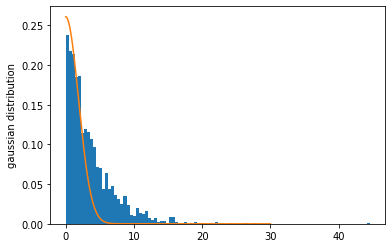

In [185]:
ax, ay, _ = plt.hist(df["abs_return"], bins=100, density=True, stacked=True)
mean = 0; std = (df["abs_return"].std())/7; variance = np.square(std)
x = np.arange(0,30,.01)
f = 0.35*np.exp(-np.square(x-mean)/2*variance)/(np.sqrt(2*np.pi*variance))

plt.plot(x,f)
plt.ylabel('gaussian distribution')
plt.show()

<AxesSubplot:xlabel='date'>

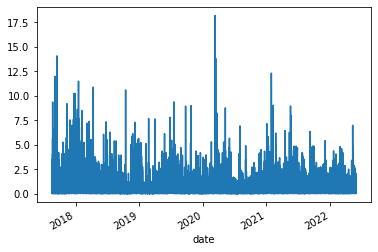

In [216]:
df["abs_return"].plot()

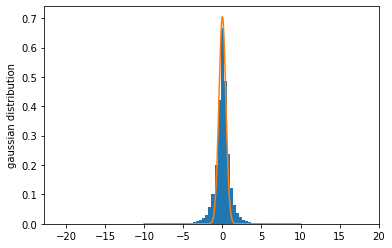

In [295]:
ax, ay, _ = plt.hist(df["return_pct"], bins=100, density=True, stacked=True)
mean = 0; std = (df["return_pct"].std())/0.5; variance = np.square(std)
x = np.arange(-10,10,.01)
f = 4*np.exp(-np.square(x-mean)/2*variance)/(np.sqrt(2*np.pi*variance))

plt.plot(x,f)
plt.ylabel('gaussian distribution')
plt.show()

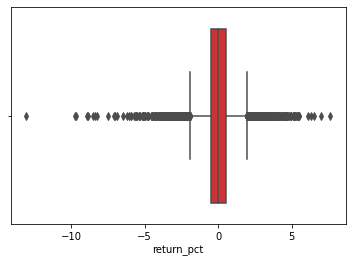

In [14]:
ax = sns.boxplot(x=df["return_pct"], palette="Set1")